<a href="https://colab.research.google.com/github/cqdirecly/Maestria_EAN/blob/main/Guias/Guia3/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **$\color{red}{\text{Solución Guía 3}}$**

Integrantes:

|Nombre | Cedula  |
|---|---|
| CHRISTIAN CAMILO QUIMBAY LOPEZ    | 80.188.132      |
| HELBER JOHN QUIMBAY LOPEZ | 80.188.133  |



## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

### Carga de librerias e importacion de la base dedatos

In [1]:
#importa la librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carga de la base de datos
df = pd.read_csv('accidents-1.csv',sep=';')  # Lee un archivo CSV en un DataFrame delimitado por ;

#mostrar las primeras 5 filas del archivo
print(f'\nPrimeras 5 filas del archivo')
df.head()


Primeras 5 filas del archivo


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


### Información del dataset


In [2]:
print(f"Información del data frame: \n--------------------------")
df.info()

Información del data frame: 
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     2385

### Verificación de columnas con valores nulos

In [3]:
print(df.isnull().sum())

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


### Filtrar filas con valores faltantes

In [4]:
df[df.isnull().any(axis=1)]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


### Imputación de valores faltantes

In [5]:
#copia del dataframe
new_df = df.copy()

# 1. Imputar ZIP CODE con la moda dentro de cada BOROUGH
new_df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


# 2. Imputar LATITUDE y LONGITUDE con la media dentro de cada BOROUGH
new_df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
new_df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# 3. Imputar ON STREET NAME con 'UNKNOWN' cuando esté vacío
new_df['ON STREET NAME'] = new_df['ON STREET NAME'].fillna('UNKNOWN')

# 4. Imputar los FACTORES de VEHICULOS con 'Unspecified'
new_df['CONTRIBUTING FACTOR VEHICLE 1'] = new_df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
new_df['CONTRIBUTING FACTOR VEHICLE 2'] = new_df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified')
new_df['CONTRIBUTING FACTOR VEHICLE 3'] = new_df['CONTRIBUTING FACTOR VEHICLE 3'].fillna('Unspecified')
new_df['CONTRIBUTING FACTOR VEHICLE 4'] = new_df['CONTRIBUTING FACTOR VEHICLE 4'].fillna('Unspecified')
new_df['CONTRIBUTING FACTOR VEHICLE 5'] = new_df['CONTRIBUTING FACTOR VEHICLE 5'].fillna('Unspecified')


# 5. Imputar VEHICLE TYPE CODE con 'Unknown'
new_df['VEHICLE TYPE CODE 1'] = new_df['VEHICLE TYPE CODE 1'].fillna('Unknown')
new_df['VEHICLE TYPE CODE 2'] = new_df['VEHICLE TYPE CODE 2'].fillna('Unknown')
new_df['VEHICLE TYPE CODE 3'] = new_df['VEHICLE TYPE CODE 3'].fillna('Unknown')
new_df['VEHICLE TYPE CODE 4'] = new_df['VEHICLE TYPE CODE 4'].fillna('Unknown')
new_df['VEHICLE TYPE CODE 5'] = new_df['VEHICLE TYPE CODE 5'].fillna('Unknown')

# Verificación de imputación
print(new_df.isnull().sum())
#new_df.info()

DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


### Explicación del código en el proceso de Imputació:
1. Imputación de ZIP CODE por moda dentro de cada BOROUGH:

- Utilizamos el método groupby() para agrupar los datos por BOROUGH y luego rellenamos los valores nulos en ZIP CODE con la moda de cada grupo. Usamos mode()[0] para obtener el valor más frecuente.

2. Imputación de LATITUDE y LONGITUDE por la media dentro de cada BOROUGH:

- Similar al caso anterior, agrupamos por BOROUGH y luego aplicamos fillna() con la media de las coordenadas dentro de cada grupo.

3. Imputación de ON STREET NAME con "UNKNOWN":

- Si el valor de ON STREET NAME es nulo, se reemplaza por "UNKNOWN" utilizando el método fillna().

4. Imputación de CONTRIBUTING FACTOR VEHICLE X con "Unspecified":

- Rellenamos todos los valores nulos en las columnas correspondientes con el valor "Unspecified".

5. Imputación de VEHICLE TYPE CODE X con "Unknown":

-De igual manera, rellenamos los valores nulos en las columnas de tipo de vehículo con el valor "Unknown".

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


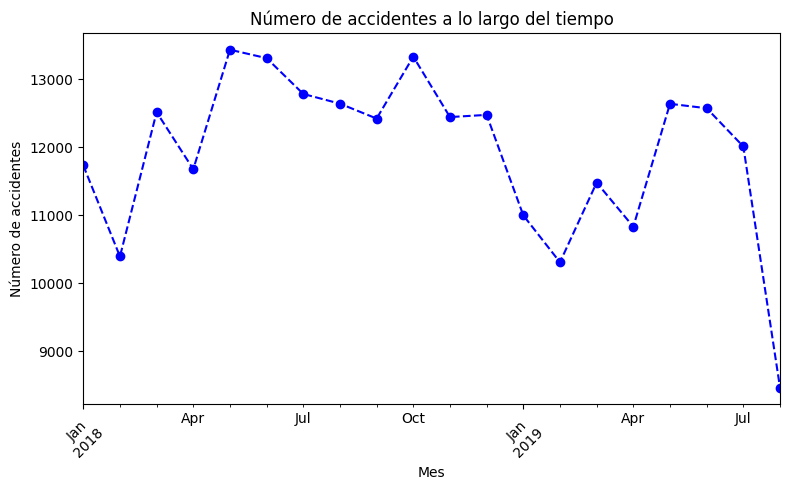

No, no ha habido un aumento significativo en el número de accidentes durante el último año y medio.


In [6]:
# Solución propuesta
# Convertir la columna 'DATE' a tipo datetime
new_df['DATE'] = pd.to_datetime(new_df['DATE'], format='%m/%d/%Y')

# Agrupar por mes
# Crear la columna 'Month' basada en la fecha
new_df['Month'] = new_df['DATE'].dt.to_period('M')

# Contar los accidentes por mes (agrupar por 'Month' y contar el número de filas)
accidentes_por_mes = new_df.groupby('Month').size()

# Crear un gráfico de líneas

plt.figure(figsize=(8, 5))
accidentes_por_mes.plot(kind='line', color='b', marker ='o', linestyle='--' )
plt.title('Número de accidentes a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#print(accidentes_por_mes)
# Análisis: Comprobar si ha aumentado el número de accidentes en el último año y medio
# Definir el periodo de interés (último año y medio)
ultimo_periodo = pd.to_datetime('today') - pd.DateOffset(months=18)
accidentes_ultimo_ano_medio = accidentes_por_mes[accidentes_por_mes.index >= ultimo_periodo.to_period('M')]

# Comparar el número de accidentes en los últimos meses con el resto
promedio_ultimo_ano_medio = accidentes_ultimo_ano_medio.mean()
promedio_total = accidentes_por_mes.mean()

if promedio_ultimo_ano_medio > promedio_total:
    print("Sí, ha habido un aumento en el número de accidentes durante el último año y medio.")
else:
    print("No, no ha habido un aumento significativo en el número de accidentes durante el último año y medio.")


El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**$\color{red}{\text{Conclusión:}}$** Los meses con los valores más bajos son febrero de 2018 y febrero de 2019.

La gráfica anterior demuestra que la base de datos contiene muchos registros en estado "Unspecified" o nulos, lo que genera datos inconsistentes.

In [7]:
# Filtrar los datos para obtener solo los accidentes en febrero de 2018 y 2019
filtro_febrero = new_df[(new_df['DATE'].dt.month == 2) & (new_df['DATE'].dt.year.isin([2018,2019]))]

# Crear una copia del DataFrame filtrado para evitar el SettingWithCopyWarning
filtro_febrero = filtro_febrero.copy()

# Crear una columna que agrupe los factores contribuyentes de los vehículos involucrados en el accidente
factores_contribuyentes = filtro_febrero[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                                          'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                                          'CONTRIBUTING FACTOR VEHICLE 5']].apply(lambda row: row.dropna().unique(), axis=1)

# Usar .loc para añadir la columna de factores contribuyentes
filtro_febrero.loc[:, 'ALL CONTRIBUTING FACTORS'] = factores_contribuyentes.apply(lambda x: ', '.join(x))

# Agrupar los accidentes por factores contribuyentes y contar la cantidad de accidentes por cada factor
accidentes_por_factor_contribuyente = filtro_febrero.groupby('ALL CONTRIBUTING FACTORS').size().sort_values(ascending=False)

# Mostrar los primeros 10 factores contribuyentes más comunes
print(accidentes_por_factor_contribuyente.head(10))


ALL CONTRIBUTING FACTORS
Unspecified                                    5126
Driver Inattention/Distraction, Unspecified    4672
Failure to Yield Right-of-Way, Unspecified     1615
Following Too Closely, Unspecified             1307
Backing Unsafely, Unspecified                  1097
Passing Too Closely, Unspecified                879
Passing or Lane Usage Improper, Unspecified     784
Turning Improperly, Unspecified                 494
Unsafe Lane Changing, Unspecified               434
Other Vehicular, Unspecified                    407
dtype: int64


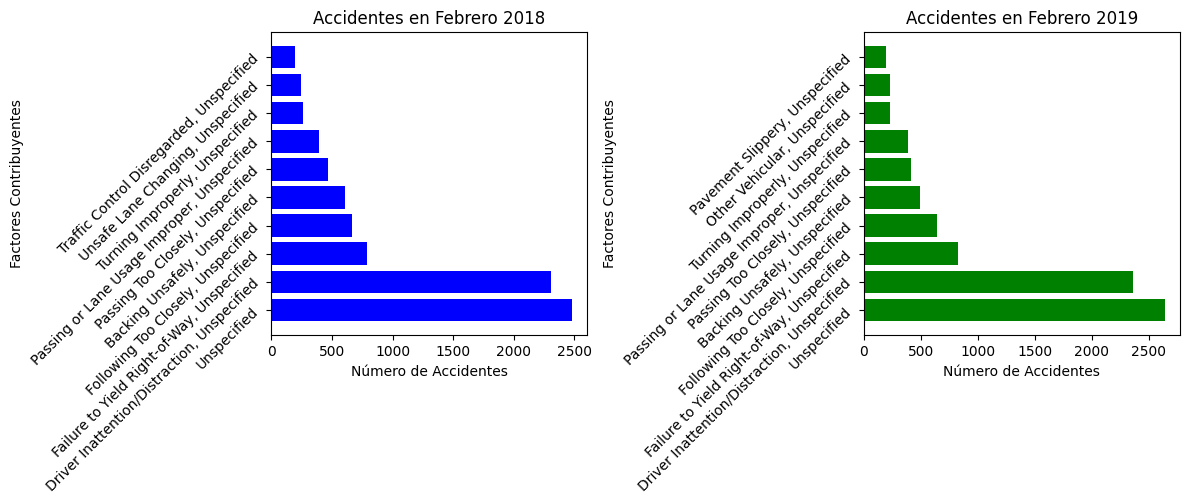

In [8]:
# Filtrar datos para febrero de 2018 y 2019
febrero_2018 = filtro_febrero[filtro_febrero['DATE'].dt.year == 2018]
febrero_2019 = filtro_febrero[filtro_febrero['DATE'].dt.year == 2019]

# Agrupar los accidentes por factores contribuyentes para cada año
accidentes_2018 = febrero_2018.groupby('ALL CONTRIBUTING FACTORS').size().sort_values(ascending=False)
accidentes_2019 = febrero_2019.groupby('ALL CONTRIBUTING FACTORS').size().sort_values(ascending=False)

# Crear el gráfico con subgráficos para cada año
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para febrero de 2018
axes[0].barh(accidentes_2018.head(10).index, accidentes_2018.head(10).values, color='blue')
axes[0].set_title('Accidentes en Febrero 2018')
axes[0].set_xlabel('Número de Accidentes')
axes[0].set_ylabel('Factores Contribuyentes')
axes[0].set_yticks(range(len(accidentes_2018.head(10))))  # Establecer los ticks
axes[0].set_yticklabels(accidentes_2018.head(10).index, rotation=45)

# Gráfico para febrero de 2019
axes[1].barh(accidentes_2019.head(10).index, accidentes_2019.head(10).values, color='green')
axes[1].set_title('Accidentes en Febrero 2019')
axes[1].set_xlabel('Número de Accidentes')
axes[1].set_ylabel('Factores Contribuyentes')
axes[1].set_yticks(range(len(accidentes_2019.head(10))))  # Establecer los ticks
axes[1].set_yticklabels(accidentes_2019.head(10).index, rotation=45)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Ejercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

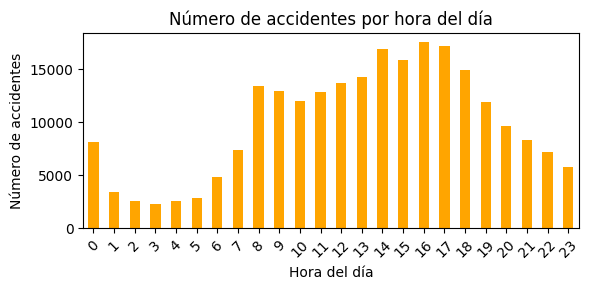

In [9]:
# Solución propuesta
# Convertir la columna 'DATE' a tipo datetime

new_df['FULL_DATE_TIME'] = pd.to_datetime(new_df['DATE'].dt.strftime('%Y/%m/%d') + ' ' + new_df['TIME'], format='%Y/%m/%d %H:%M')

new_df['HOUR'] = new_df['FULL_DATE_TIME'].dt.hour

# Contar los accidentes por mes (agrupar por 'Month' y contar el número de filas)
accidentes_por_hora = new_df.groupby('HOUR').size()

# Crear un gráfico de líneas

plt.figure(figsize=(6, 3))
accidentes_por_hora.plot(kind='bar', color='orange', linestyle='--' )
plt.title('Número de accidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.tight_layout()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**$\color{red}{\text{Crítica:}}$** Se hace necesario realizar un análisis más profundo con los datos recibidos para así poder segmentar todas las variables, ya que esta gráfica es muy generalizada y nos da poco enfoque de análisis.


### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

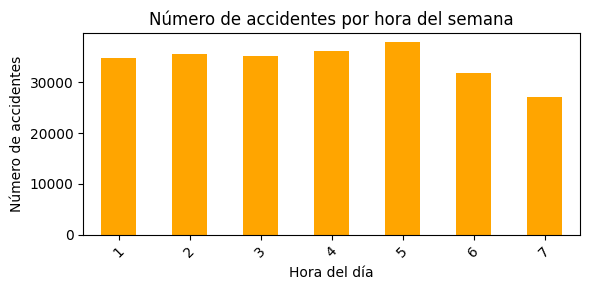

In [10]:
# Solución propuesta
#Se crea nueva columna WEEK
new_df['WEEK'] = new_df['FULL_DATE_TIME'].dt.weekday + 1

# Contar los accidentes por mes (agrupar por 'Month' y contar el número de filas)
accidentes_por_dia_de_la_semana = new_df.groupby('WEEK').size()

# Crear un gráfico de líneas

plt.figure(figsize=(6, 3))
accidentes_por_dia_de_la_semana.plot(kind='bar', color='orange', linestyle='--' )
plt.title('Número de accidentes por hora del semana')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.tight_layout()



### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

BOROUGH
BROOKLYN         76253
QUEENS           67120
MANHATTAN        48749
BRONX            37709
STATEN ISLAND     8691
Name: count, dtype: int64


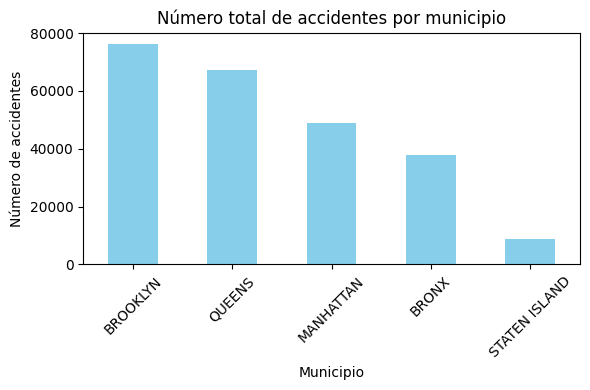

In [11]:
# Solución propuesta

# Calcular el número total de accidentes por municipio
accidents_per_borough = df['BOROUGH'].value_counts()

# Mostrar los resultados
print(accidents_per_borough)

# Crear un gráfico de barras del número total de accidentes por municipio
plt.figure(figsize=(6, 4))
accidents_per_borough.plot(kind='bar', color='skyblue')
plt.title('Número total de accidentes por municipio')
plt.xlabel('Municipio')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

BOROUGH
BRONX             893.578199
BROOKLYN         1098.746398
MANHATTAN        2147.533040
QUEENS            617.479301
STATEN ISLAND     151.147826
dtype: float64


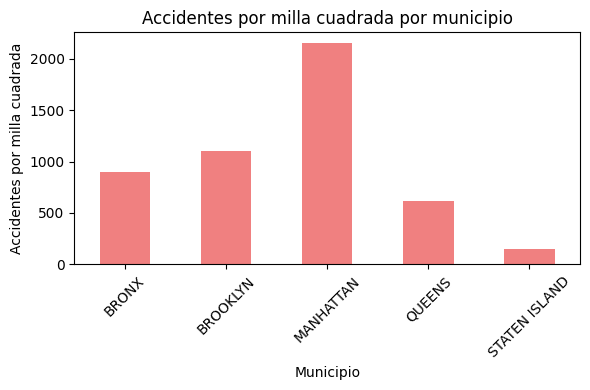

In [12]:
# Supongamos que tienes un diccionario con el área de cada municipio en millas cuadradas
borough_area = {
    'MANHATTAN': 22.7,
    'BROOKLYN': 69.4,
    'QUEENS': 108.7,
    'BRONX': 42.2,
    'STATEN ISLAND': 57.5
}

# Crear una columna con el área del municipio correspondiente
df['BOROUGH AREA'] = df['BOROUGH'].map(borough_area)

# Calcular accidentes por milla cuadrada
accidents_per_sq_mile = accidents_per_borough / df.groupby('BOROUGH')['BOROUGH AREA'].first()

# Mostrar los resultados
print(accidents_per_sq_mile)

# Crear un gráfico de barras del número de accidentes por milla cuadrada
plt.figure(figsize=(6,4))
accidents_per_sq_mile.plot(kind='bar', color='lightcoral')
plt.title('Accidentes por milla cuadrada por municipio')
plt.xlabel('Municipio')
plt.ylabel('Accidentes por milla cuadrada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

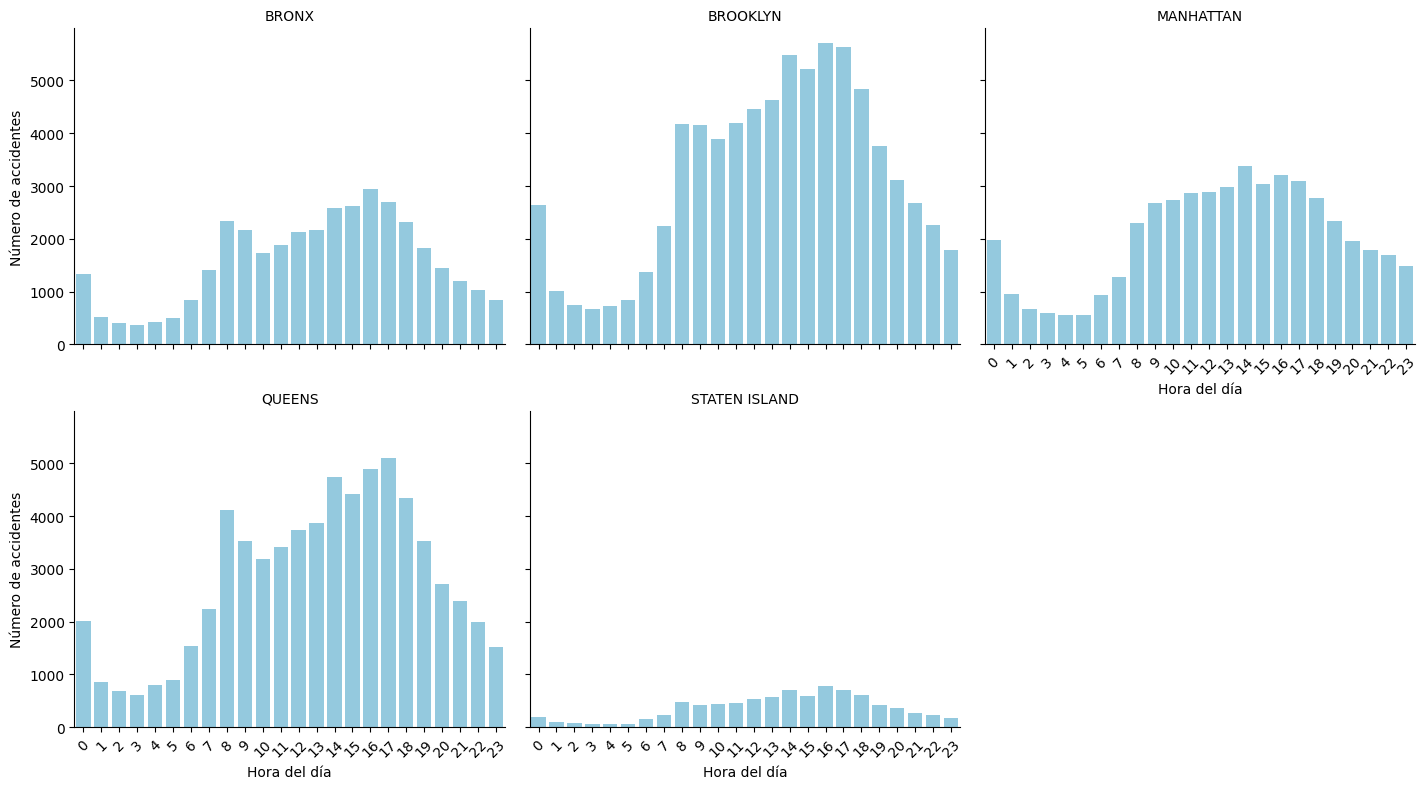

In [13]:
# Solución propuesta

# Agrupar por municipio y hora, y contar los accidentes
accidents_by_hour = new_df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='ACCIDENT_COUNT')

# Crear un gráfico de FacetGrid para trazar accidentes por hora para cada municipio
g = sns.FacetGrid(accidents_by_hour, col="BOROUGH", col_wrap=3, height=4, aspect=1.2)

# Usar un gráfico de barras para cada municipio, especificando el orden de las horas
g.map(sns.barplot, 'HOUR', 'ACCIDENT_COUNT', color='skyblue', order=range(24))

# Ajustar los títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels('Hora del día', 'Número de accidentes')
g.set_xticklabels(range(24), rotation=45)  # Etiquetas para cada hora del día

# Ajustar el espacio entre las gráficas
g.fig.subplots_adjust(hspace=1.5, wspace=0.7)

# Mejorar el diseño
plt.tight_layout()
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

In [14]:
# Solución propuesta

# Concatenamos las columnas de factores contribuyentes
factores = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],
                      df['CONTRIBUTING FACTOR VEHICLE 2'],
                      df['CONTRIBUTING FACTOR VEHICLE 3'],
                      df['CONTRIBUTING FACTOR VEHICLE 4'],
                      df['CONTRIBUTING FACTOR VEHICLE 5']],
                     axis=0)

# Resetear el índice para evitar problemas de repetición de índices
factores = factores.reset_index(drop=True)

# Eliminar valores nulos
factores = factores.dropna()
factores = factores[factores != "Unspecified"]

# Contamos la frecuencia de cada factor
factores_count = factores.value_counts().head(10)

# Mostrar los 10 factores más comunes
print(factores_count)



Driver Inattention/Distraction    72203
Failure to Yield Right-of-Way     20413
Following Too Closely             17909
Backing Unsafely                  15068
Passing Too Closely               13378
Passing or Lane Usage Improper    12953
Other Vehicular                   11093
Unsafe Lane Changing               6986
Turning Improperly                 6798
Traffic Control Disregarded        5146
Name: count, dtype: int64


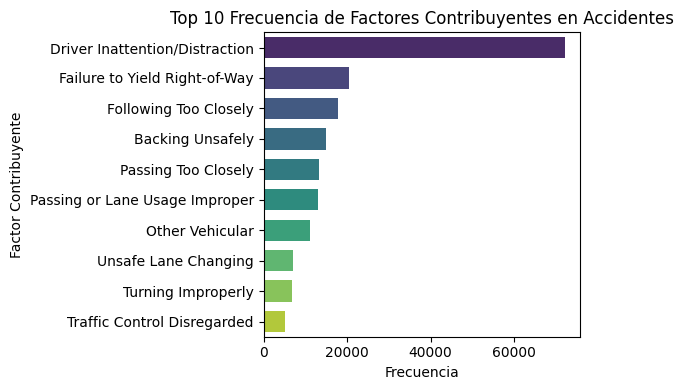

In [15]:
# Obtener los top 10 factores más comunes
top_10_factores = factores_count.head(10)

# Graficamos las frecuencias de los factores de contribución
plt.figure(figsize=(6, 4))

# Usamos el parámetro 'hue' para las categorías y 'x' para las frecuencias
sns.barplot(x=top_10_factores.values, y=top_10_factores.index, palette='viridis', hue=top_10_factores.index, dodge=False, width=0.7)

# Añadimos etiquetas y título
plt.title('Top 10 Frecuencia de Factores Contribuyentes en Accidentes')
plt.xlabel('Frecuencia')
plt.ylabel('Factor Contribuyente')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

In [16]:
# Solución propuesta

# Concatenamos las columnas de factores contribuyentes
factores = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],
                      df['CONTRIBUTING FACTOR VEHICLE 2'],
                      df['CONTRIBUTING FACTOR VEHICLE 3'],
                      df['CONTRIBUTING FACTOR VEHICLE 4'],
                      df['CONTRIBUTING FACTOR VEHICLE 5']],
                     axis=0)

# Resetear el índice para evitar problemas de repetición de índices
factores = factores.reset_index(drop=True)

# Eliminar valores nulos
factores = factores.dropna()
factores = factores[factores != "Unspecified"]

# Contamos la frecuencia de cada factor
factores_count = factores.value_counts().head(10)

# Mostrar los factores más comunes
print(factores_count)

Driver Inattention/Distraction    72203
Failure to Yield Right-of-Way     20413
Following Too Closely             17909
Backing Unsafely                  15068
Passing Too Closely               13378
Passing or Lane Usage Improper    12953
Other Vehicular                   11093
Unsafe Lane Changing               6986
Turning Improperly                 6798
Traffic Control Disregarded        5146
Name: count, dtype: int64


<ipython-input-17-26f42cb0d33f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted['vehicle_type'] = df_melted['vehicle_type'].str.lower().str.strip()


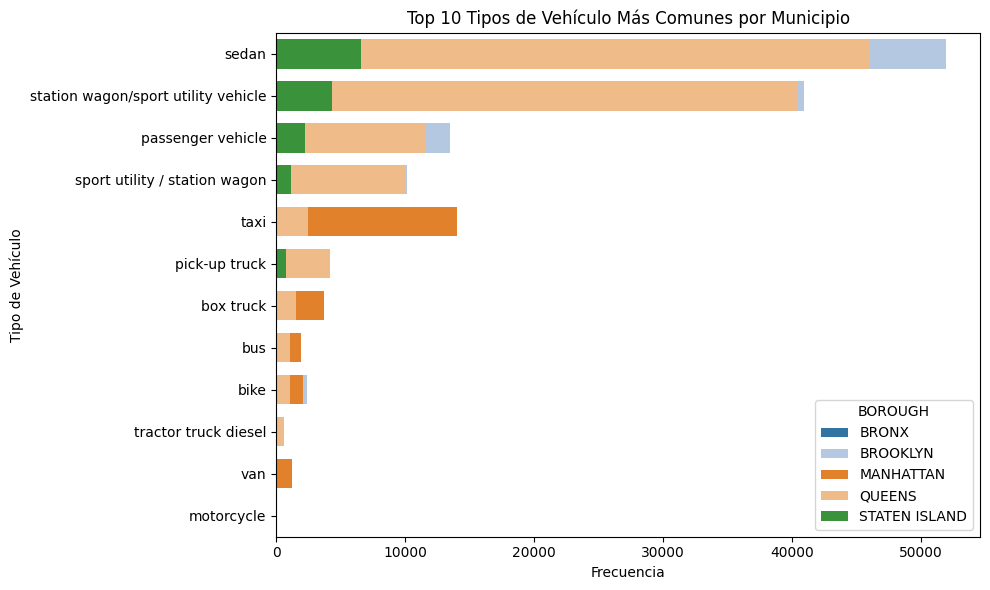

In [17]:
# Solución propuesta

# Agrupar las columnas de tipo de vehiculo para tener una sola columna
vehicle_types_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Ajusta los nombres de la columna
df_melted = df.melt(id_vars=['BOROUGH'], value_vars=vehicle_types_columns,
                    var_name='vehicle_type_column', value_name='vehicle_type')

# Eliminar valores nulos si es necesario
df_melted = df_melted.dropna(subset=['vehicle_type'])

# Unificar el tipo de vehículo
df_melted['vehicle_type'] = df_melted['vehicle_type'].str.lower().str.strip()

# Agrupar por municipio y tipo de vehículo, y contar las frecuencias
vehicle_type_por_municipio = df_melted.groupby(['BOROUGH', 'vehicle_type']).size().reset_index(name='count')

# Ordenar por municipio y frecuencia y seleccionar los 10 más comunes por municipio
top_10_vehicle_type_municipality = vehicle_type_por_municipio.sort_values(['BOROUGH', 'count'], ascending=[True, False])
top_10_vehicle_type_municipality = top_10_vehicle_type_municipality.groupby('BOROUGH').head(10).reset_index(drop=True)

# Graficar los top 10 por municipio
plt.figure(figsize=(10, 6))

# Usamos el parámetro 'hue' para diferenciar los municipios, y 'x' para la frecuencia
sns.barplot(x='count', y='vehicle_type', hue='BOROUGH', data=top_10_vehicle_type_municipality, palette='tab20', dodge=False, width=0.7)

# Añadir etiquetas y título
plt.title('Top 10 Tipos de Vehículo Más Comunes por Municipio')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Vehículo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [22]:
new_df['DATE'] = pd.to_datetime(new_df['DATE'])
primer_trimestre = new_df[(new_df['DATE'].dt.year == 2019) & (new_df['DATE'].dt.month <= 3)]

# Filtrar accidentes que involucran peatones y ciclistas
accidentes_peatones = primer_trimestre[primer_trimestre['NUMBER OF PEDESTRIANS INJURED'] > 0]
accidentes_ciclistas = primer_trimestre[primer_trimestre['NUMBER OF CYCLIST INJURED'] > 0]

# Sumamos los accidentes que involucran peatones y ciclistas
suma_peatones_heridos = accidentes_peatones['NUMBER OF PEDESTRIANS INJURED'].sum()
suma_peatones_muertos = accidentes_peatones['NUMBER OF PEDESTRIANS KILLED'].sum()
suma_ciclistas_heridos = accidentes_ciclistas['NUMBER OF CYCLIST INJURED'].sum()
suma_ciclistas_muertos = accidentes_ciclistas['NUMBER OF CYCLIST KILLED'].sum()

# Total de accidentes involucrando peatones y ciclistas
total_accidentes = suma_peatones_heridos + suma_peatones_muertos + suma_ciclistas_heridos + suma_ciclistas_muertos

# Concatenar todas las columnas de causas relevantes (suponiendo que existen más de una columna de causas)
causas_comb = pd.concat([accidentes_peatones['CONTRIBUTING FACTOR VEHICLE 1'],
                         accidentes_peatones['CONTRIBUTING FACTOR VEHICLE 2'],
                         accidentes_peatones['CONTRIBUTING FACTOR VEHICLE 3'],
                         accidentes_peatones['CONTRIBUTING FACTOR VEHICLE 4'],
                         accidentes_peatones['CONTRIBUTING FACTOR VEHICLE 5']], axis=0)

# Contar las ocurrencias de las causas
causas_peatones_combinadas = causas_comb.value_counts()

# Hacer lo mismo para los ciclistas, si también tienes múltiples columnas de causas
causas_comb_ciclistas = pd.concat([accidentes_ciclistas['CONTRIBUTING FACTOR VEHICLE 1'],
                         accidentes_ciclistas['CONTRIBUTING FACTOR VEHICLE 2'],
                         accidentes_ciclistas['CONTRIBUTING FACTOR VEHICLE 3'],
                         accidentes_ciclistas['CONTRIBUTING FACTOR VEHICLE 4'],
                         accidentes_ciclistas['CONTRIBUTING FACTOR VEHICLE 5']], axis=0)

causas_ciclistas_combinadas = causas_comb_ciclistas.value_counts()

# Podemos mostrar las 5 principales causas para ambos casos
top_causas_peatones = causas_peatones_combinadas.head(5)
top_causas_ciclistas = causas_ciclistas_combinadas.head(5)

# Imprimir resultados
print(f"Accidentes involucrando peatones en el primer trimestre de 2019: {suma_peatones_heridos} heridos y {suma_peatones_muertos} muertos")
print(f"Accidentes involucrando ciclistas en el primer trimestre de 2019: {suma_ciclistas_heridos} heridos y {suma_ciclistas_muertos} muertos")
print(f"Total de accidentes: {total_accidentes}")
print("_______________")

print("\nTop 5 causas de accidentes con peatones:")
print(top_causas_peatones)

print("_______________")
print("\nTop 5 causas de accidentes con ciclistas:")
print(top_causas_ciclistas)



Accidentes involucrando peatones en el primer trimestre de 2019: 2056 heridos y 1 muertos
Accidentes involucrando ciclistas en el primer trimestre de 2019: 487 heridos y 0 muertos
Total de accidentes: 2544
_______________

Top 5 causas de accidentes con peatones:
Unspecified                                              8524
Failure to Yield Right-of-Way                             521
Driver Inattention/Distraction                            504
Backing Unsafely                                           80
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      72
Name: count, dtype: int64
_______________

Top 5 causas de accidentes con ciclistas:
Unspecified                                              1903
Driver Inattention/Distraction                            208
Failure to Yield Right-of-Way                              76
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      66
Traffic Control Disregarded                                35
Name: count, dtype: int64


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

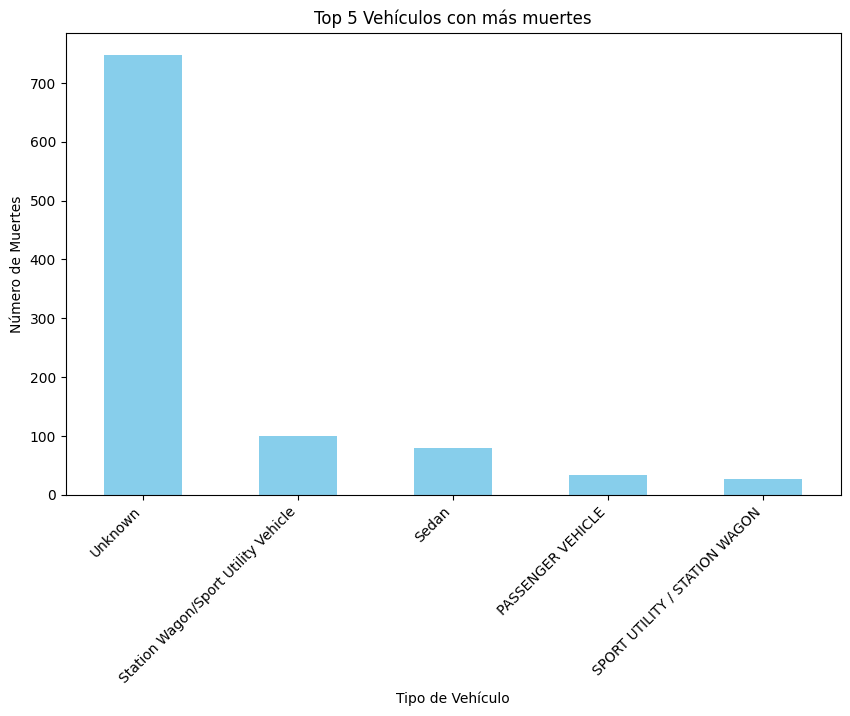

Top 5 vehículos con más muertes:
Unknown                                748
Station Wagon/Sport Utility Vehicle    100
Sedan                                   79
PASSENGER VEHICLE                       33
SPORT UTILITY / STATION WAGON           26
dtype: int64


In [19]:
# Solución propuesta

# Crear una nueva columna con el número total de muertes en el accidente
new_df['TOTAL DE MUERTES'] = (
    new_df['NUMBER OF PEDESTRIANS KILLED'] +
    new_df['NUMBER OF CYCLIST KILLED'] +
    new_df['NUMBER OF MOTORIST KILLED']
)

# Convertir las columnas de tipo de vehículo y el total de muertes a matrices numpy
vehiculos = new_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].to_numpy()
muertes = new_df['TOTAL DE MUERTES'].to_numpy()

# Crear un diccionario para contar las muertes por tipo de vehículo
muertes_por_vehiculo = {}

# Iterar por cada fila de los vehículos y las muertes usando numpy
for i in range(len(vehiculos)):
    # Obtener las muertes para esta fila
    total_muertes = muertes[i]

    # Recorrer las 5 columnas de tipo de vehículo para esta fila
    for j in range(5):
        vehiculo = vehiculos[i][j]
        if pd.notna(vehiculo) and total_muertes > 0:
            if vehiculo in muertes_por_vehiculo:
                muertes_por_vehiculo[vehiculo] += total_muertes
            else:
                muertes_por_vehiculo[vehiculo] = total_muertes

# Convertir el diccionario a una serie para ordenar por el número de muertes
muertes_por_vehiculo = pd.Series(muertes_por_vehiculo).sort_values(ascending=False)

# Seleccionar los 5 vehículos con más muertes
top_5_vehiculos = muertes_por_vehiculo.head(5)

# Graficar el resultado
plt.figure(figsize=(10, 6))
top_5_vehiculos.plot(kind='bar', color='skyblue')
plt.title('Top 5 Vehículos con más muertes')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Muertes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Imprimir el resultado
print("Top 5 vehículos con más muertes:")
print(top_5_vehiculos)
